In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from scipy.fftpack import fft
from pydub import AudioSegment
from scipy import signal

In [2]:
my_audio = './resources/classic_techno_lead_with_recorder.wav'
my_audio_2 = './resources/classic_techno_lead_with_recorder_2_channels.wav'

In [3]:
sound = AudioSegment.from_wav(my_audio)
sound = sound.set_channels(2)
sound.export(my_audio_2, format="wav")

<_io.BufferedRandom name='./resources/classic_techno_lead_with_recorder_2_channels.wav'>

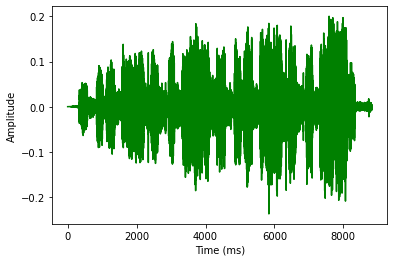

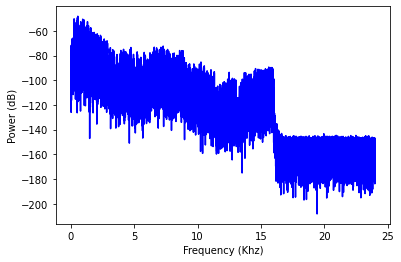

In [4]:
# Read file and get sampling freq [ usually 44100 Hz ]  and sound object
sampling_freq, my_sound = wavfile.read(my_audio_2)

# Check if wave file is 16bit or 32 bit. 24bit is not supported
my_sound_data_type = my_sound.dtype

# We can convert our sound array to floating point values ranging from -1 to 1 as follows

my_sound = my_sound / (2. ** 15)

# Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

my_sound_shape = my_sound.shape
sample_points = float(my_sound.shape[0])

# Get duration of sound file
signal_duration = my_sound.shape[0] / sampling_freq

# If two channels, then select only one channel
my_sound_one_channel = my_sound[:, 0]

# Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
time_array = np.arange(0, sample_points, 1)

time_array = time_array / sampling_freq

# Scale to milliSeconds
time_array = time_array * 1000

# Plot the tone
plt.plot(time_array, my_sound_one_channel, color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

# Plot frequency content
# We can get frquency from amplitude and time using FFT , Fast Fourier Transform algorithm

# Get length of mySound object array
my_sound_length = len(my_sound)

# Take the Fourier transformation on given sample point
# fftArray = fft(mySound)
fft_array = fft(my_sound_one_channel)

num_unique_points = np.ceil((my_sound_length + 1) / 2.0)
fft_array = fft_array[0:int(num_unique_points)]

# FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
# By taking absolute value , we get only real part

fft_array = abs(fft_array)

# Scale the fft array by length of sample points so that magnitude does not depend on
# the length of the signal or on its sampling frequency

fft_array = fft_array / float(my_sound_length)

# FFT has both positive and negative information. Square to get positive only
fft_array = fft_array ** 2

# Multiply by two (research why?)
# Odd NFFT excludes Nyquist point
if my_sound_length % 2 > 0:  #we've got odd number of points in fft
    fft_array[1:len(fft_array)] = fft_array[1:len(fft_array)] * 2

else:  # We've got even number of points in fft
    fft_array[1:len(fft_array) - 1] = fft_array[1:len(fft_array) - 1] * 2

freq_array = np.arange(0, num_unique_points, 1.0) * (sampling_freq / my_sound_length)

# Plot the frequency
plt.plot(freq_array / 1000, 10 * np.log10(fft_array), color='blue')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.show()

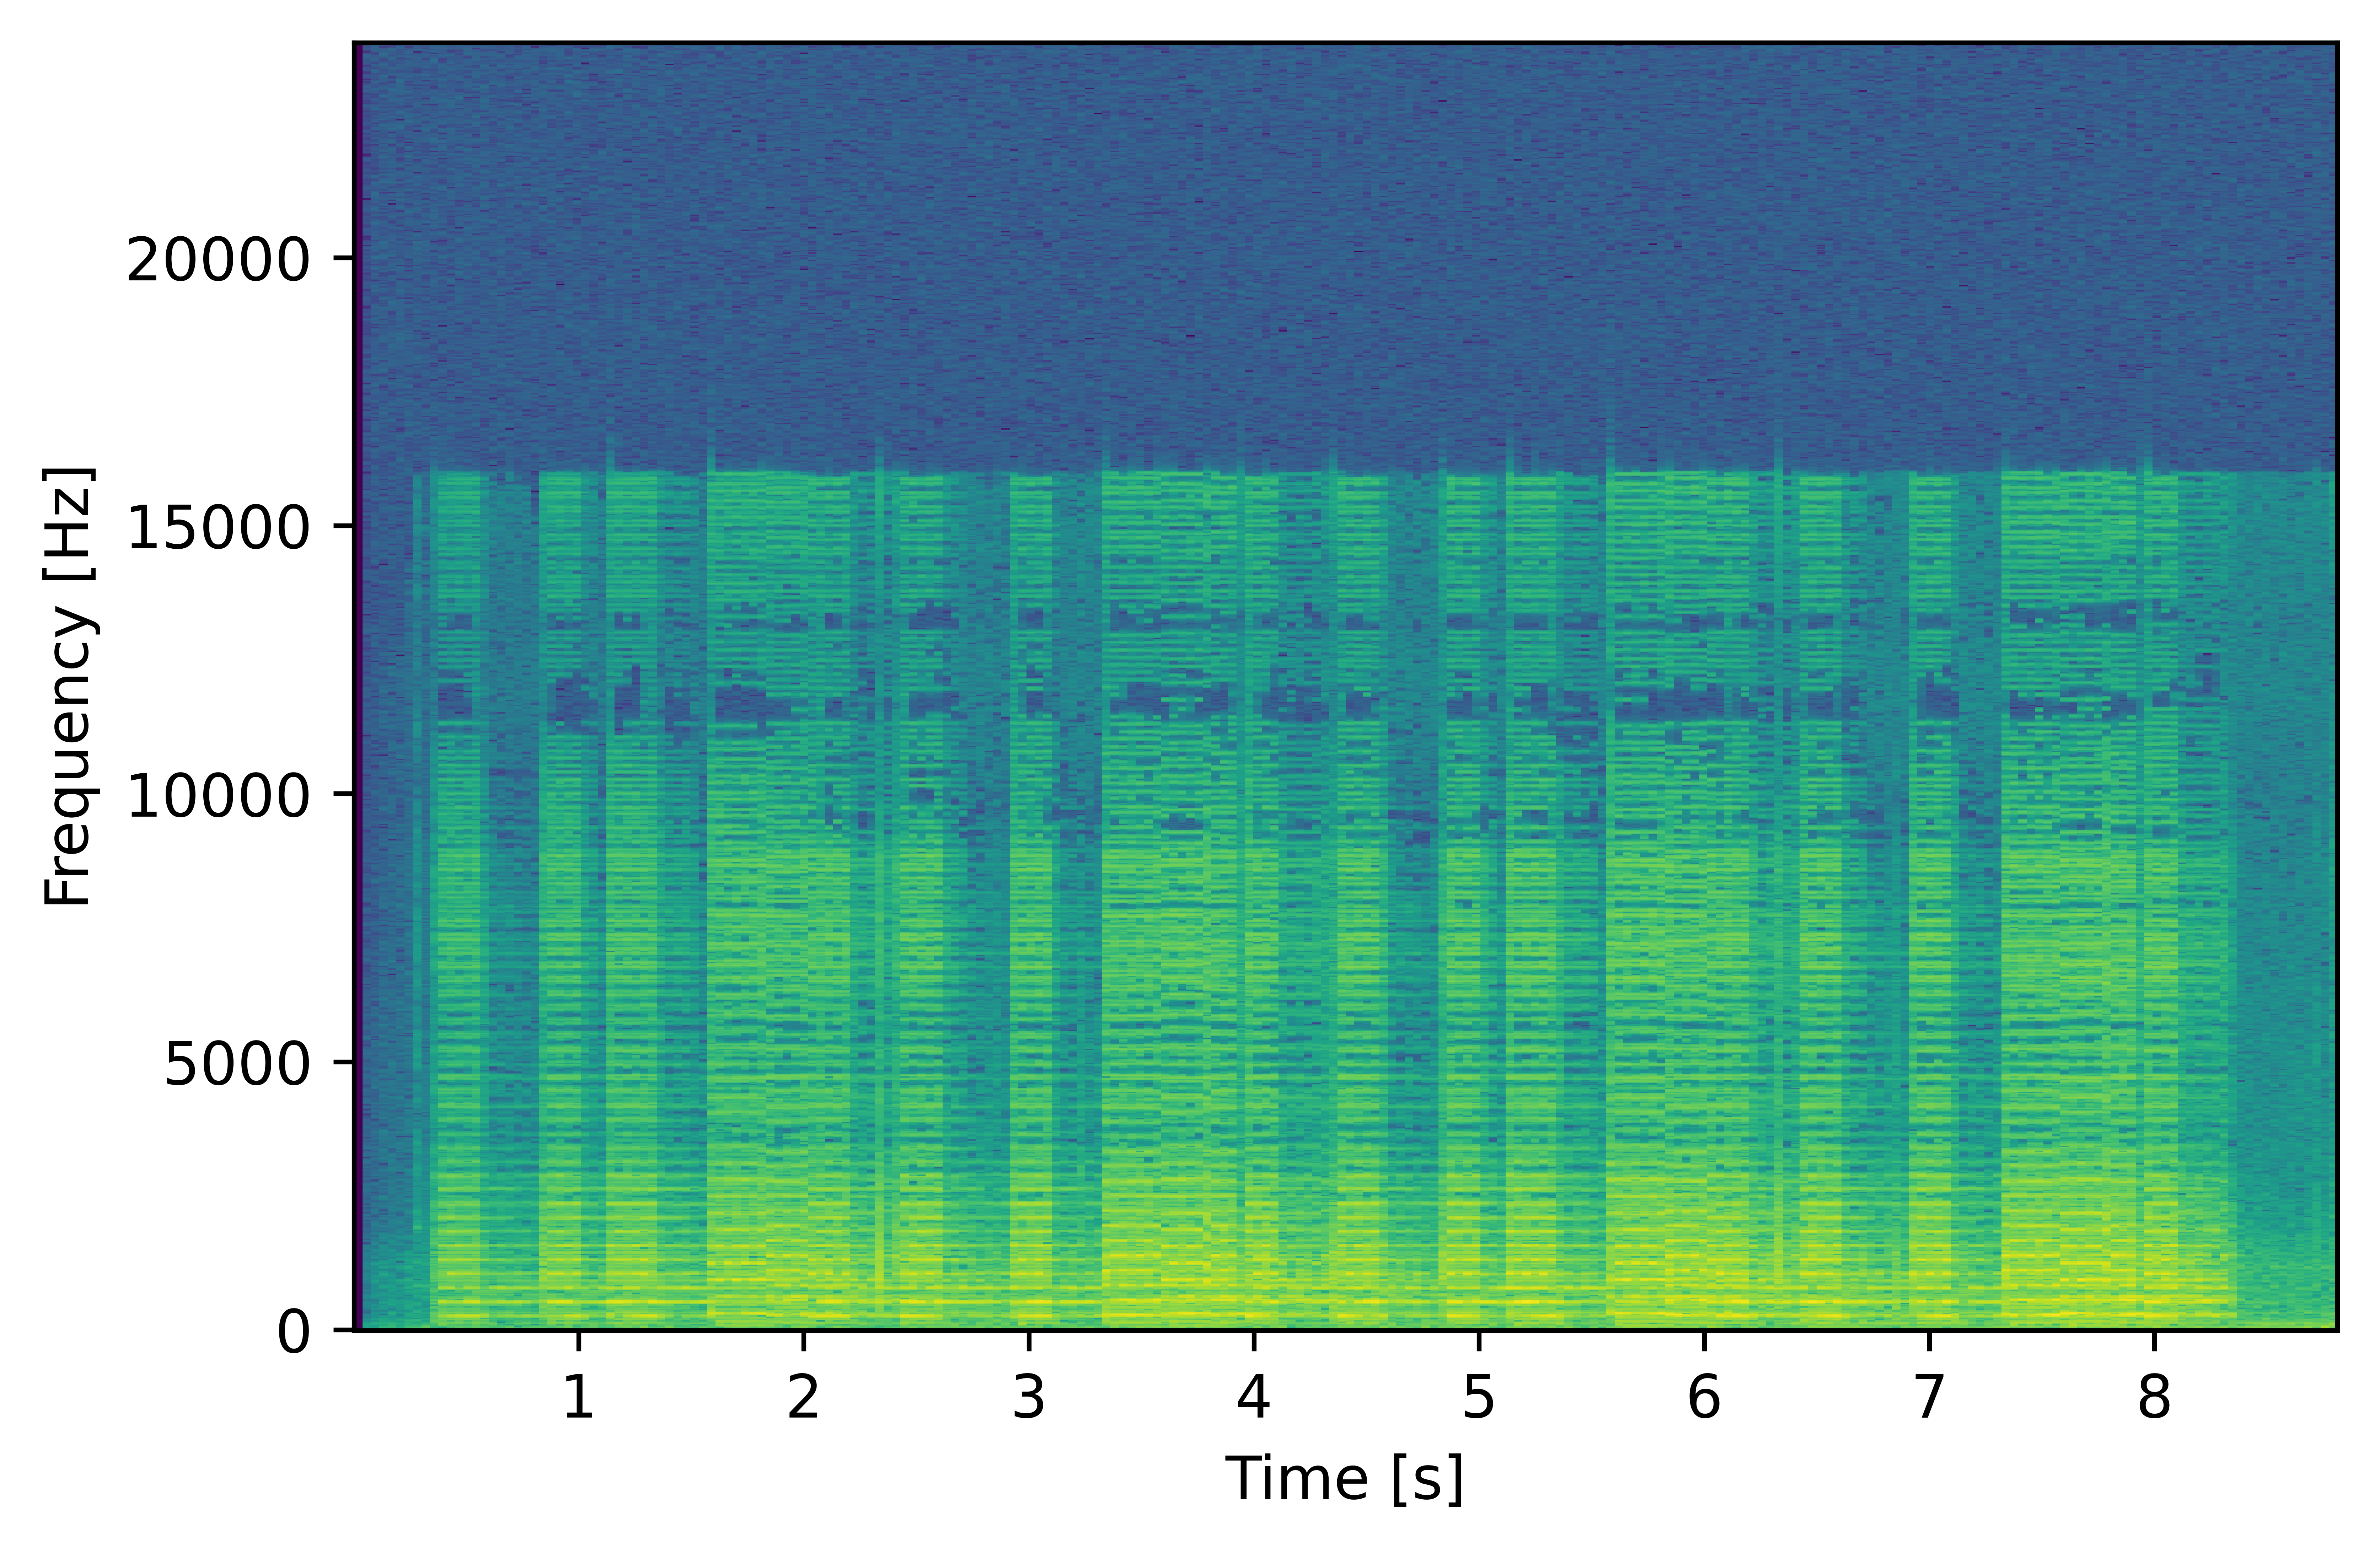

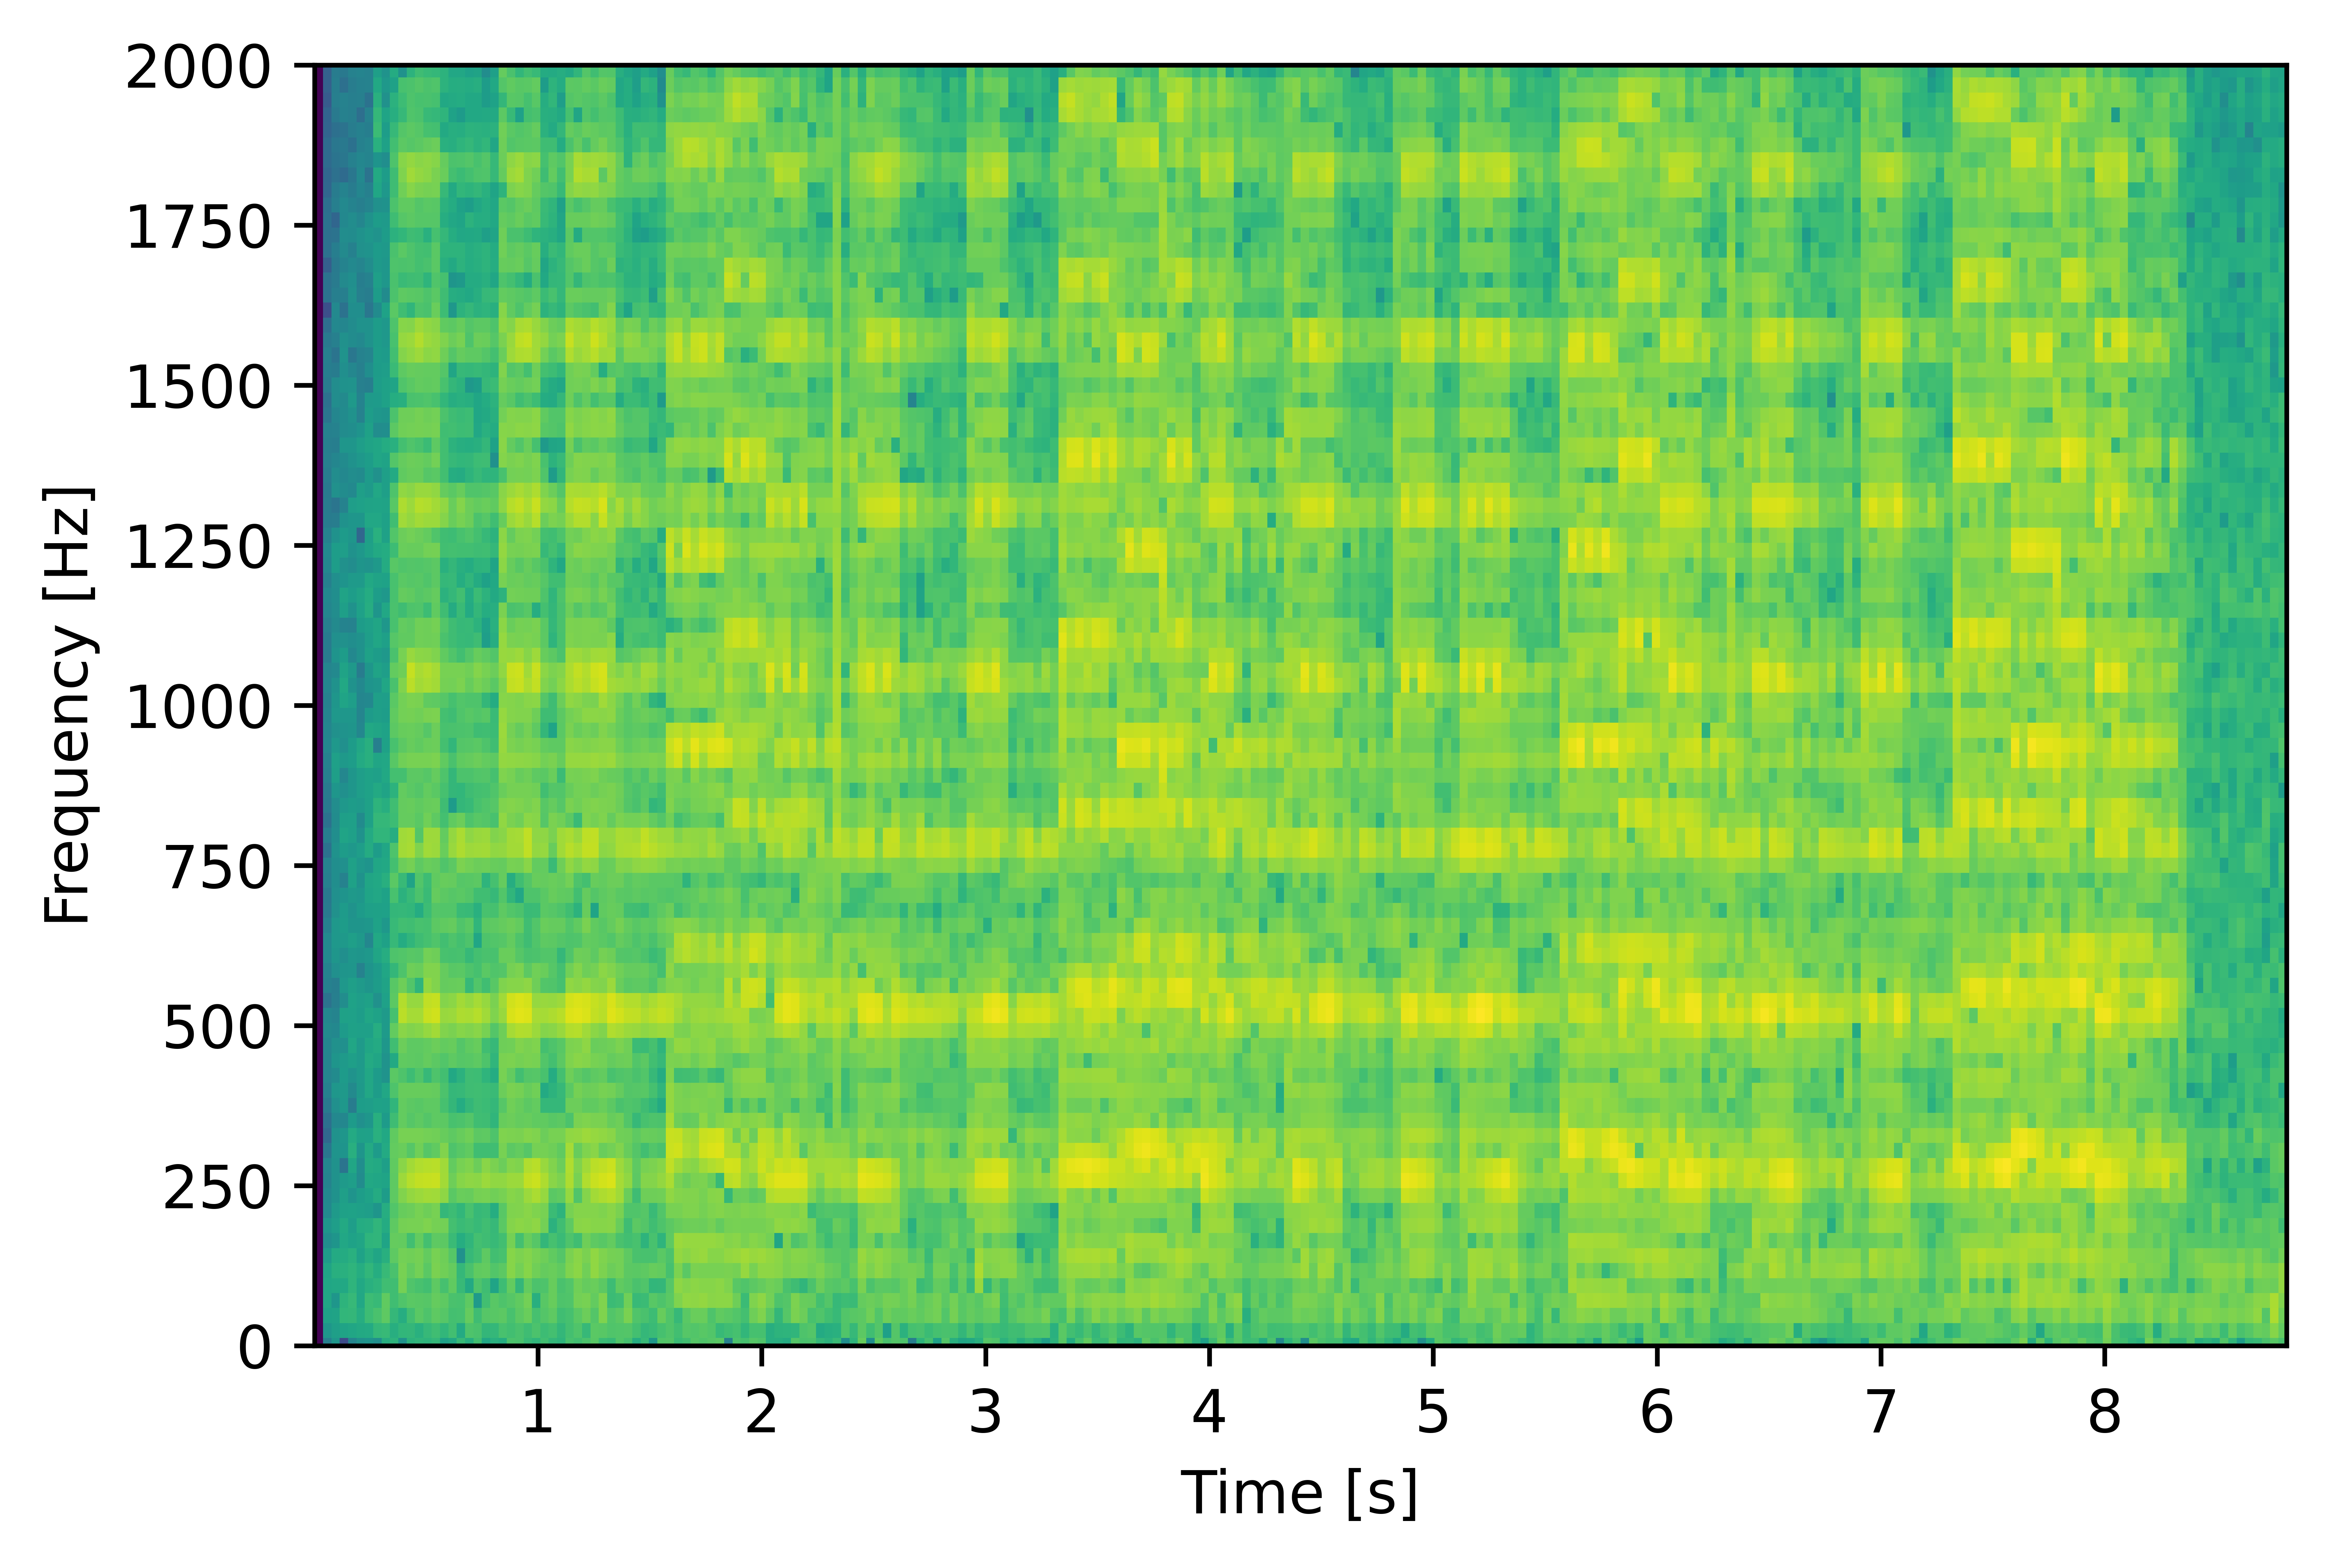

In [5]:
song = AudioSegment.from_file(my_audio)
song = song.set_channels(1)
fs = song.frame_rate

samples = song.get_array_of_samples()
N = 2048 * 1
f, t, Sxx = signal.spectrogram(np.array(samples), fs, window=signal.windows.hann(N), nfft=N)
plt.figure(dpi=1200)
plt.pcolormesh(t, f, np.log10(Sxx + 1e-10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()
plt.figure(dpi=1200)
plt.pcolormesh(t, f, np.log10(Sxx + 1e-10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(0, 2000)
plt.show()

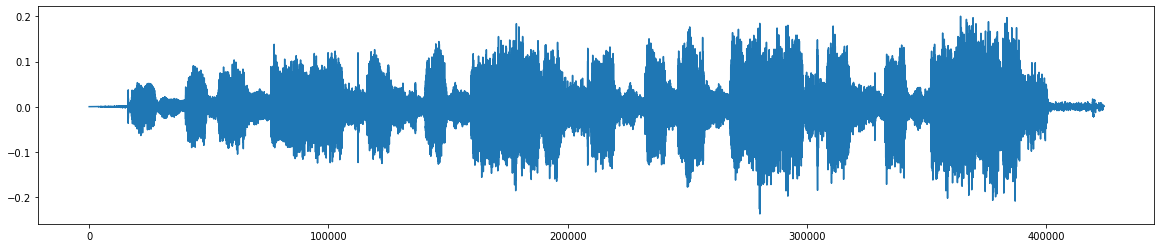

In [6]:
Д_, data = wavfile.read(my_audio)
data = data / 32768
_, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

In [7]:
!ffmpeg -y -i ./resources/classic_techno_lead_with_recorder.wav -af "afftdn=nf=-25" ./resources/classic_techno_lead_with_recorder_1.wav

ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox

In [8]:
!ffmpeg -y -i ./resources/classic_techno_lead_with_recorder_1.wav -af "afftdn=nf=-25" ./resources/classic_techno_lead_with_recorder_2.wav

ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox

In [9]:
!ffmpeg -y -i ./resources/classic_techno_lead_with_recorder_2.wav -af "highpass=f=200, lowpass=f=5000" ./resources/classic_techno_lead_with_recorder_3.wav

ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox

In [10]:
!ffmpeg -y -i ./resources/classic_techno_lead_with_recorder_3.wav -af "volume=4" ./resources/classic_techno_lead_with_recorder_dn.wav

ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox

In [11]:
my_dn_audio = './resources/classic_techno_lead_with_recorder_dn.wav'

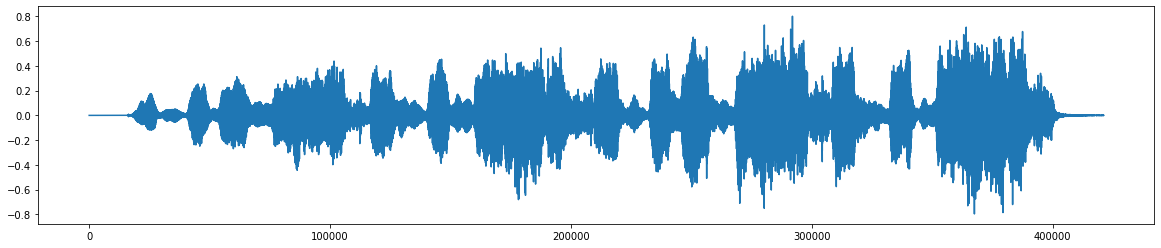

In [12]:
_, data = wavfile.read(my_dn_audio)
data = data / 32768
_, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

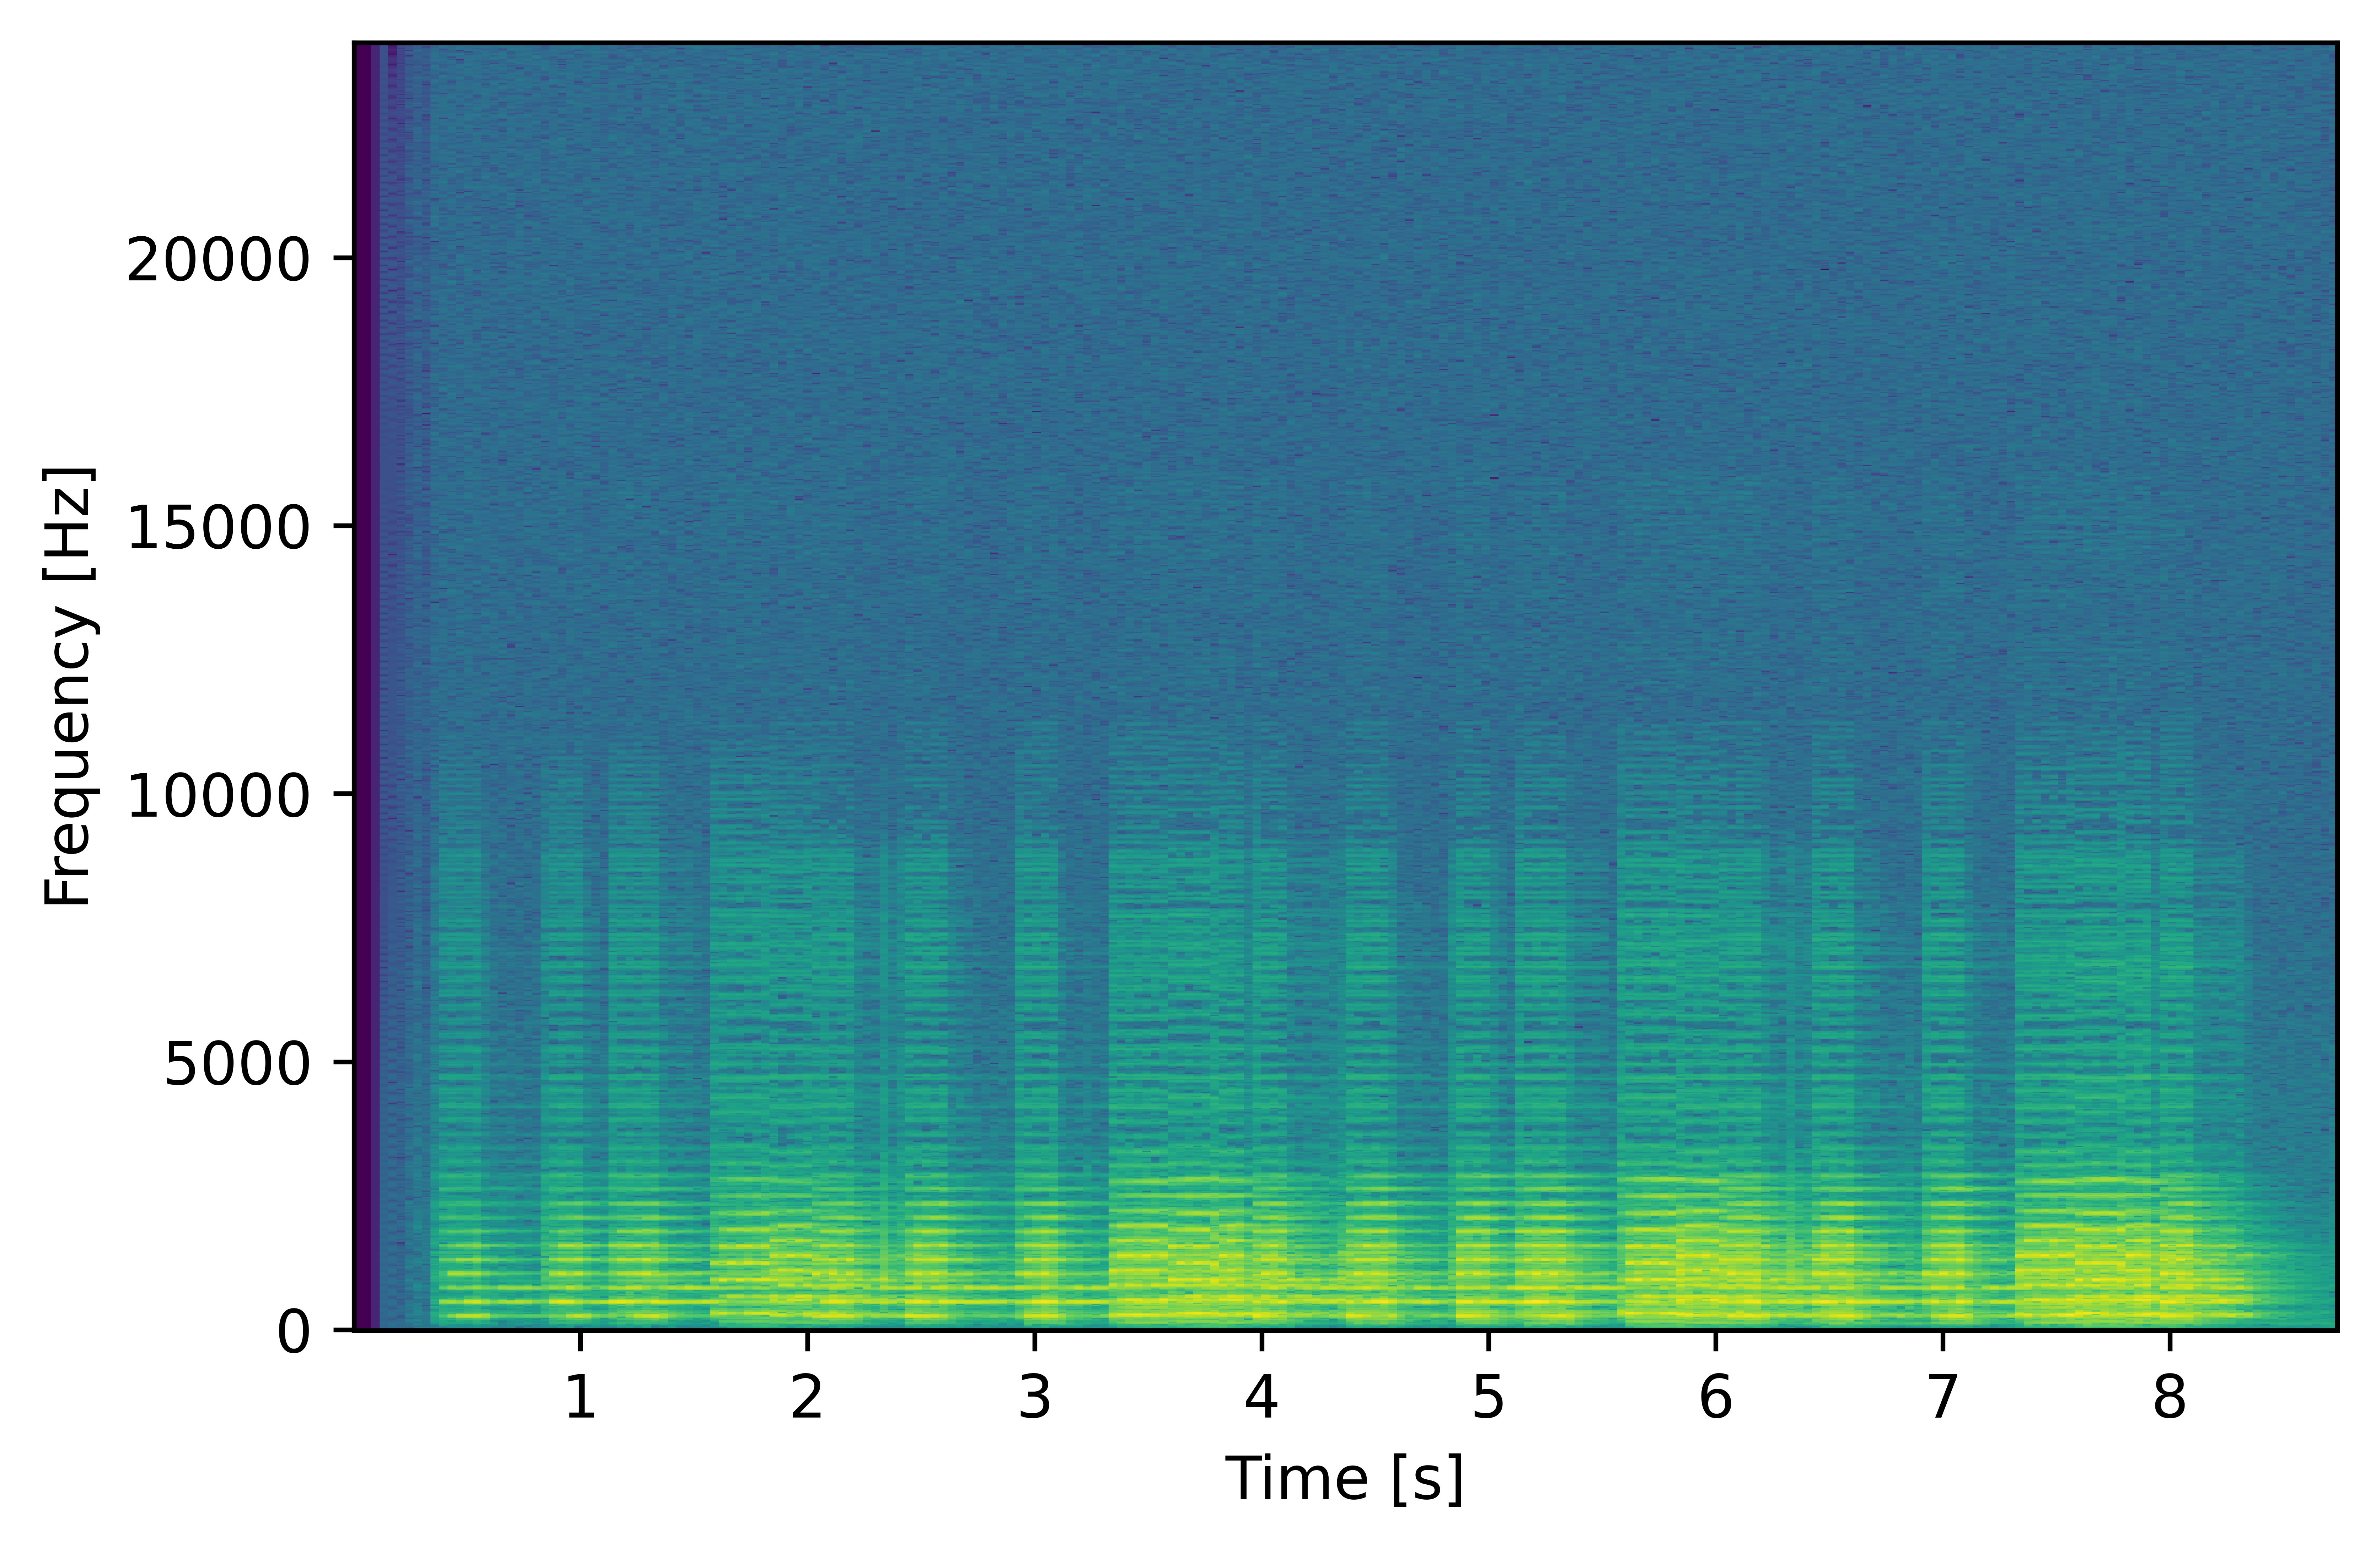

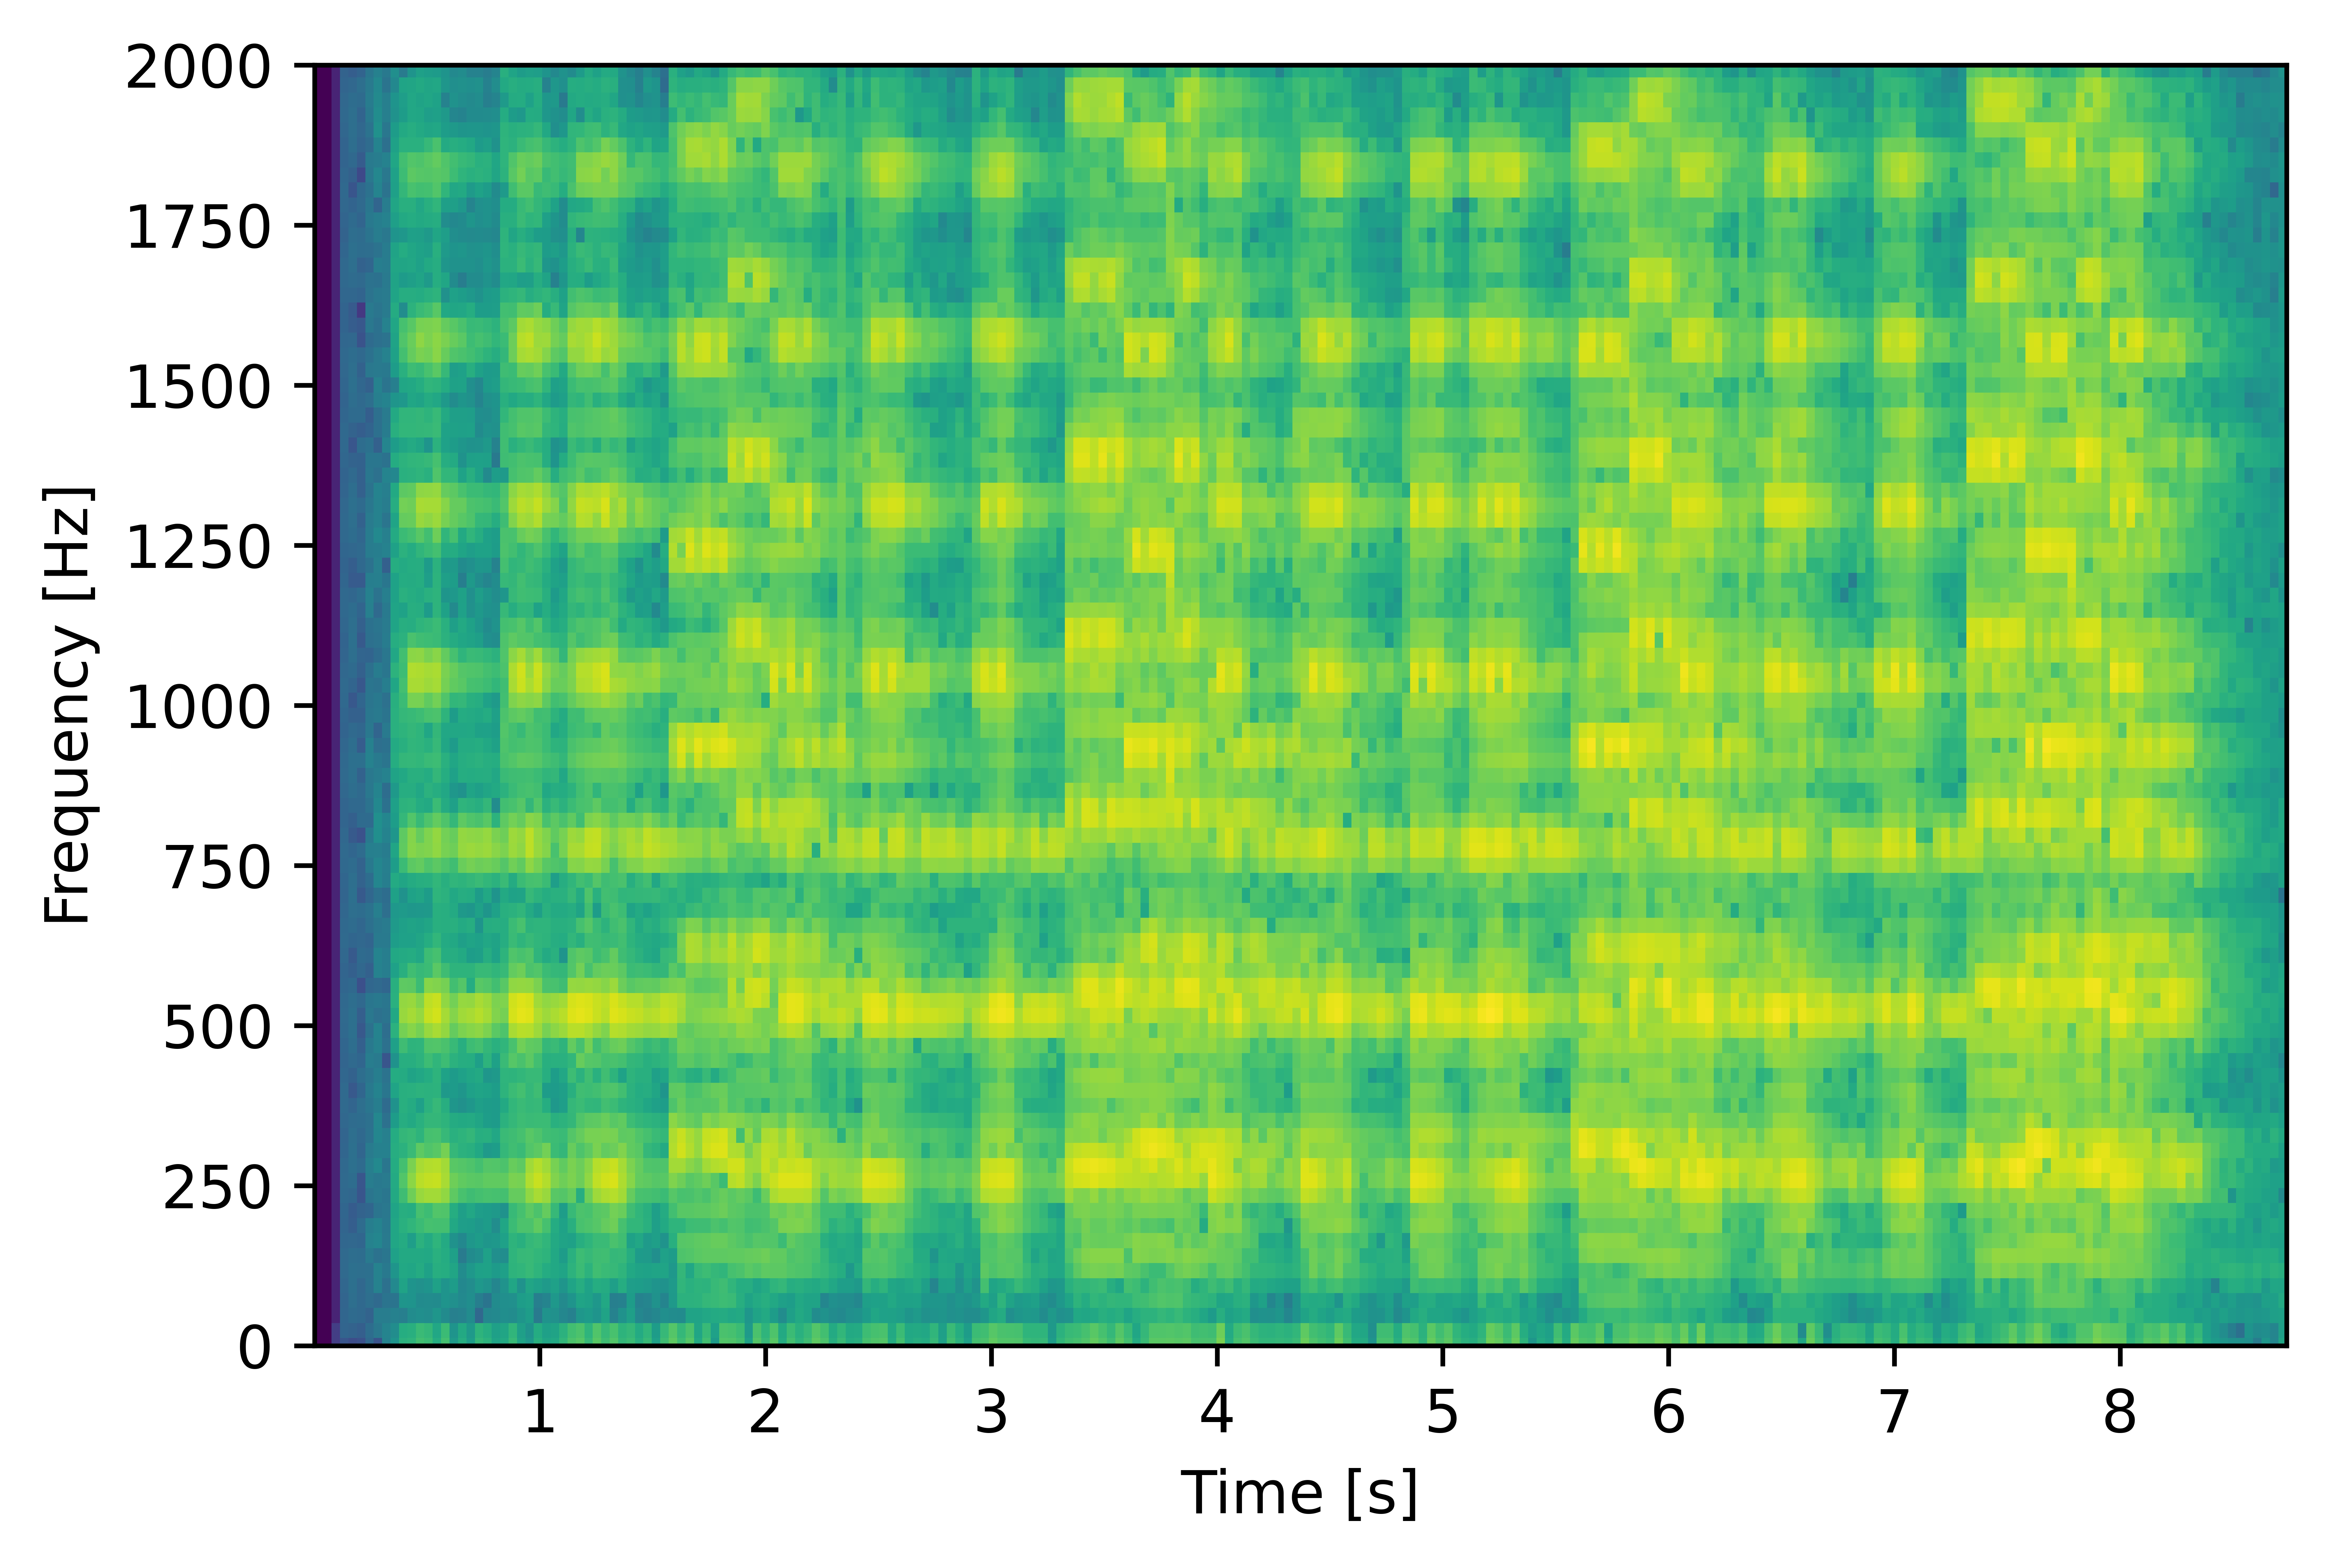

In [13]:
song = AudioSegment.from_file(my_dn_audio)
song = song.set_channels(1)
fs = song.frame_rate

samples = song.get_array_of_samples()
N = 2048 * 1
f, t, Sxx = signal.spectrogram(np.array(samples), fs, window=signal.windows.hann(N), nfft=N)
plt.figure(dpi=1200)
plt.pcolormesh(t, f, np.log10(Sxx + 1e-10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()
plt.figure(dpi=1200)
plt.pcolormesh(t, f, np.log10(Sxx + 1e-10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(0, 2000)
plt.show()